# Amazon Sales Data

## Description:

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Specify the file path
file_path = r'C:/Users/ADMIN/Downloads/amazon.csv'  

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

## Questions:

1. What is the average rating for each product category?

In [3]:
# check unique values in the 'rating' column
unique_ratings = df['rating'].unique()
print(unique_ratings)

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']



The unique values in the 'rating' column include numeric values, as well as a few non-numeric values such as '4', '3', '2', and '|'. To proceed with calculating the average rating for each product category, we need to clean the 'rating' column and ensure that it contains only numeric values.

In [6]:
# Clean the 'rating' column
df['rating'] = df['rating'].str.replace('|', '') # Remove '|'
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce') # Conver to numeric, coerce errors to NaN

# Group the data by the 'category' column and calculate the average rating for each category
average_rating_by_category = df.groupby('category')['rating'].mean()

# Print the average rating for each product category
print(average_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

2. What are the top rating_count products by category? 

In [7]:
# Convert 'rating_count' column to numeric, coerce errors to NaN
df['rating_count'] = pd.to_numeric(df['rating_count'], errors = 'coerce')

# Drop rows with NaN values in 'rating_count' column
df.dropna(subset = ['rating_count'], inplace = True)

# Group the data by the 'category' column and find the top rating_count products in each category
top_products_by_category = df.groupby('category').apply(lambda x: x.nlargest(5, 'rating_count'))

# Print the top products in each category
print(top_products_by_category[['product_name', 'rating_count']])


                                                                                              product_name  \
category                                                                                                     
Computers&Accessories|Accessories&Peripherals|C... 900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...   
Computers&Accessories|Accessories&Peripherals|C... 32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
                                                   151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
                                                   823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
                                                   147   Ambrane Fast 100W Output Cable with Type-C to ...   
...                                                                                                    ...   
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifi... 1424         KENT POWP-Sediment Filter 10'' Thread WCAP   
          

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2840\2073007645.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_category = df.groupby('category').apply(lambda x: x.nlargest(5, 'rating_count'))


3. What is the distribution of discounted prices vs. actual prices?

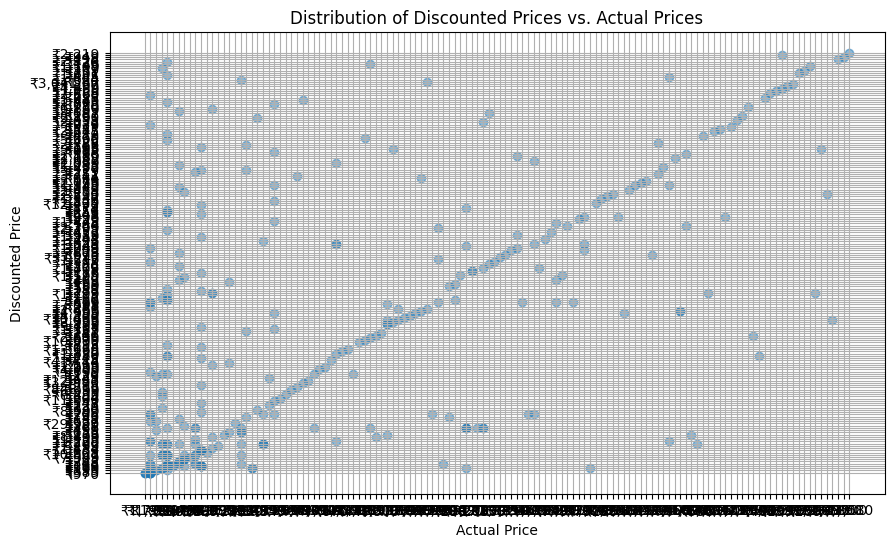

In [8]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()

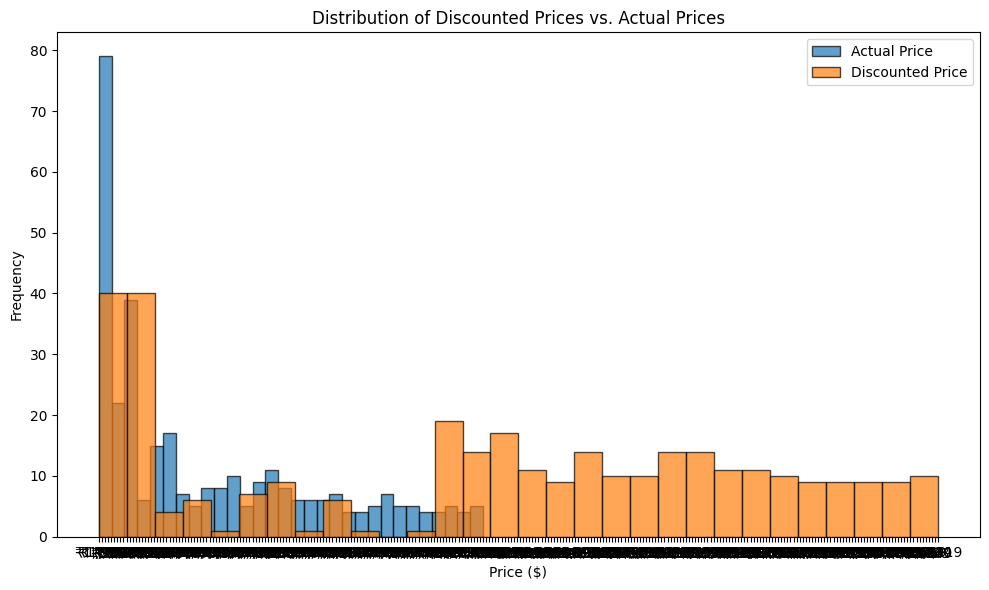

In [9]:
# Create histograms for actual prices and discounted prices
plt.figure(figsize=(10, 6))
plt.hist(df['actual_price'], bins=30, alpha=0.7, label='Actual Price', edgecolor='black')
plt.hist(df['discounted_price'], bins=30, alpha=0.7, label='Discounted Price', edgecolor='black')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


4. How does the average discount percentage vary across categories?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2840\3757405474.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


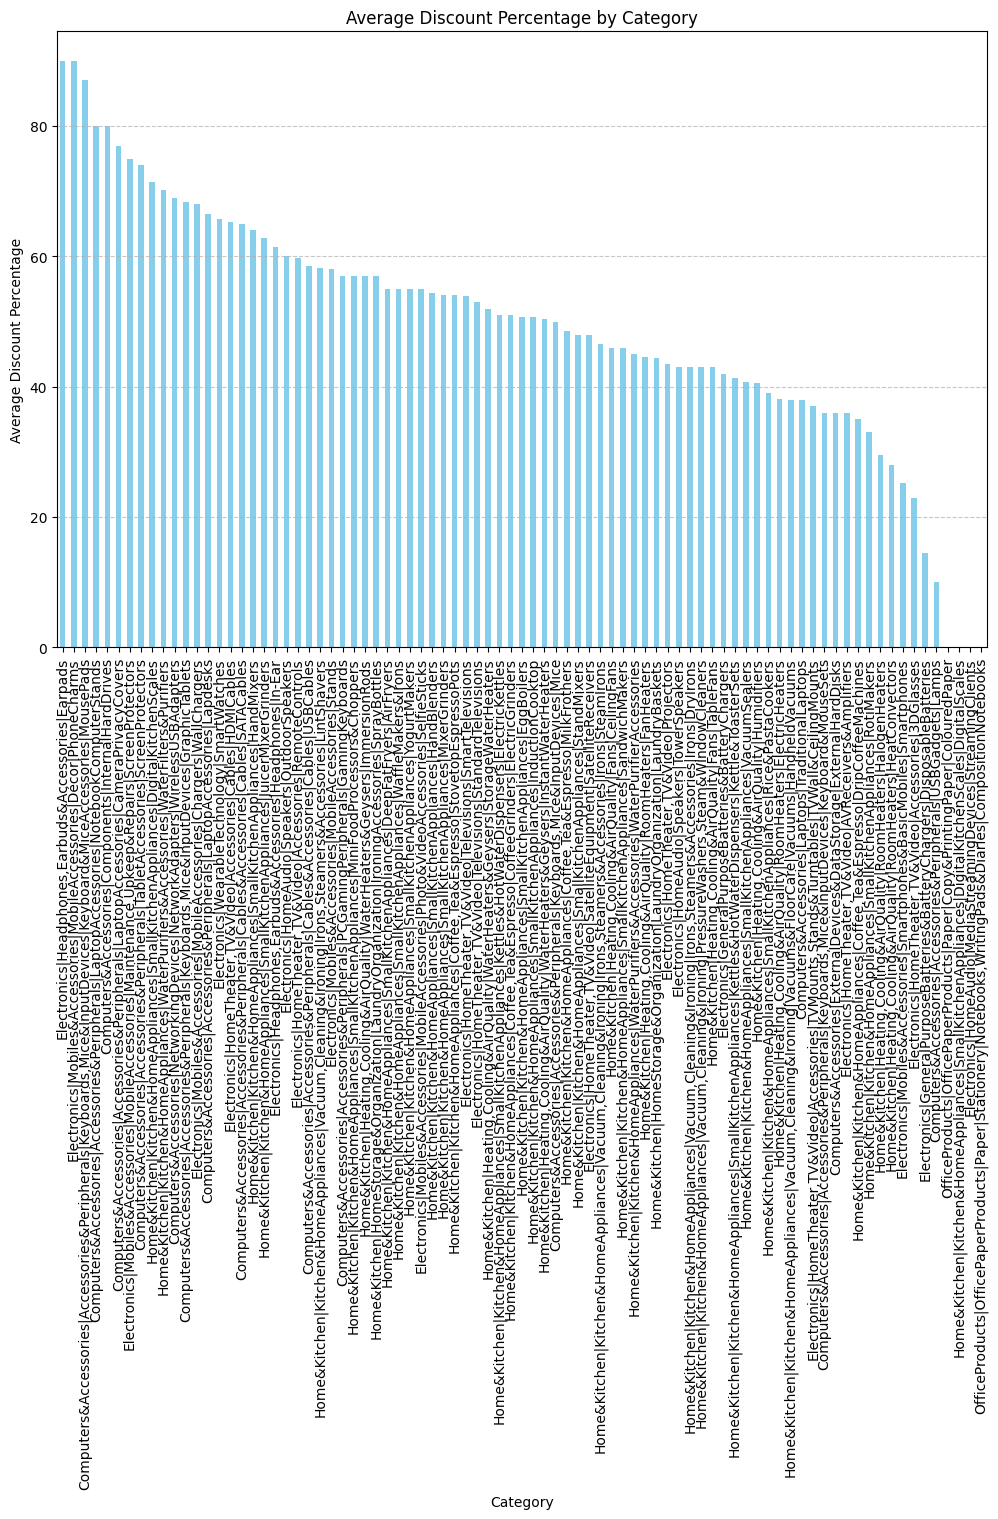

In [10]:
# Remove '%' from the 'discount_percentage' column and convert it to numeric
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)

# Calculate the average discount percentage for each category
average_discount_by_category = df.groupby('category')['discount_percentage'].mean()

# Sort the categories based on average discount percentage
average_discount_by_category = average_discount_by_category.sort_values(ascending=False)

# Plot the average discount percentage by category
plt.figure(figsize=(12, 8))
average_discount_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5. What are the most popular product names?

In [11]:
# Group the data by 'product_name' and count the occurrences
popular_product_names = df['product_name'].value_counts()

# Print the top 10 most popular product names
print(popular_product_names.head(10))


product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                                                            3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                                                       3
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)                                                            3
Portronics Konnect L 20W PD Quick Charge Type-C to 8-Pin USB Mobile Charging Cable, 1.2M, Tangle Resistant, Fast Data Sync(Grey)                                                                                                                   

6. What are the most popular product keywords?

In [12]:
from collections import Counter
import re

# Tokenize product names and extract individual words
all_words = ' '.join(df['product_name']).lower()  # Concatenate all product names
words = re.findall(r'\b\w+\b', all_words)  # Tokenize words

# Count the occurrences of each word
word_counts = Counter(words)

# Print the top 10 most popular product keywords
print(word_counts.most_common(10))


[('for', 204), ('with', 154), ('cable', 116), ('1', 101), ('black', 97), ('c', 89), ('and', 85), ('usb', 82), ('remote', 69), ('compatible', 66)]


7. What are the most popular product reviews?

In [13]:
# Concatenate review title and review content to represent review text
df['review_text'] = df['review_title'] + ' ' + df['review_content']

# Tokenize review text and extract individual words
all_words = ' '.join(df['review_text']).lower()  # Concatenate all review text
words = re.findall(r'\b\w+\b', all_words)  # Tokenize words

# Count the occurrences of each word
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort the word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most popular product reviews
print("Most popular product reviews:")
for word, count in sorted_word_counts[:10]:
    print(f"{word}: {count} occurrences")

Most popular product reviews:
the: 2062 occurrences
good: 1817 occurrences
it: 1784 occurrences
is: 1692 occurrences
and: 1521 occurrences
product: 1460 occurrences
to: 1380 occurrences
for: 1293 occurrences
i: 1017 occurrences
a: 951 occurrences


8. What is the correlation between discounted_price and rating?

In [26]:
# Remove non-numeric characters and convert to float
df['discounted_price'] = df['discounted_price'].replace('[^0-9.]', '', regex=True).astype(float)

# Calculate the correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'])

# Print the correlation value
print("Correlation between discounted_price and rating:", correlation)

Correlation between discounted_price and rating: 0.08151967980593859


9. What are the Top 5 categories based on the highest ratings?

In [29]:
# Calculate the average rating for each category
average_rating_by_category = df.groupby('category')['rating'].mean()

# Sort the categories based on average rating in descending order
top_categories = average_rating_by_category.sort_values(ascending = False)

# Select the top 5 categories
top_5_categories = top_categories.head(5)

# Print the top 5 categories
print("Top 5 categories based on hights rating:")
print(top_5_categories)

Top 5 categories based on hights rating:
category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice           5.00
Electronics|Mobiles&Accessories|MobileAccessories|Photo&VideoAccessories|SelfieSticks    4.60
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                             4.50
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers    4.45
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                      4.40
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.


Based on the data analysis, there are several potential areas for improvement or optimization:

1. **Product Recommendations**: Utilize the information on top-rated products and categories to improve product recommendations for customers. Implement recommendation systems that suggest products based on similar categories or high ratings.

2. **Price Optimization**: Analyze the relationship between discounted prices, actual prices, and ratings to optimize pricing strategies. Determine if there is a correlation between price discounts and customer satisfaction, and adjust pricing accordingly.

3. **Marketing Strategies**: Identify popular product keywords and incorporate them into marketing campaigns to improve visibility and attract more customers. Focus marketing efforts on top-rated products and categories to capitalize on positive customer feedback.

4. **Customer Feedback Analysis**: Analyze product reviews to identify common themes, concerns, or areas for improvement. Use sentiment analysis techniques to understand customer sentiments and prioritize product enhancements or modifications accordingly.

5. **Inventory Management**: Monitor the popularity of products and categories to optimize inventory management. Ensure adequate stock levels for top-rated products while minimizing excess inventory for less popular items.

6. **User Experience Enhancements**: Use insights from customer reviews and ratings to enhance the overall user experience. Address any recurring issues or complaints raised by customers to improve satisfaction and loyalty.

7. **Competitive Analysis**: Compare the performance of products and categories with competitors to identify competitive advantages or areas where improvements are needed. Benchmarking against competitors can provide valuable insights for strategic decision-making.

8. **Promotions and Discounts**: Based on the analysis of discount percentages and their impact on ratings, refine promotional strategies to maximize customer engagement and sales conversion. Experiment with different discount levels and promotional tactics to determine the most effective approach.

By focusing on these areas for improvement or optimization, businesses can enhance customer satisfaction, drive sales growth, and stay competitive in the market.

# Spotfy Data: Popular Hip - Hop Artists And Tracks:

## Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of 
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile 
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. 
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the 
creative prowess of the artists and their profound impact on global listeners.

## Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend 
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset 
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's 
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at 
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

In [2]:
# Specify the file path
file_path = r'C:/Users/ADMIN/Downloads/spotify.csv'  

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Questions:

1. Identify the top 5 popular artists based on the mean popularity of their tracks.Show the mean popularity of tracks for the top 5 popular artists Using BarPlot.

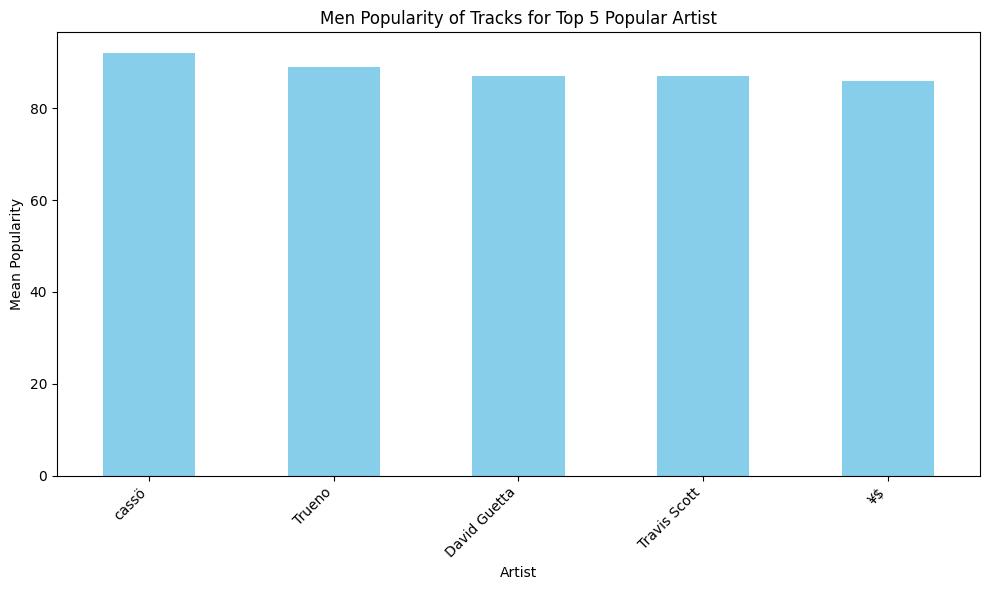

In [11]:
# Group the data by the "Artist" column and calculate the mean popularity of tracks for each artist
artist_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending = False)

# Select the top 5 artist with the highest mean popularity
top_artists = artist_popularity.head(5)

# Plotting
plt.figure(figsize = (10, 6))
top_artists.plot(kind = 'bar', color = 'skyblue')
plt.title('Men Popularity of Tracks for Top 5 Popular Artist')
plt.xlabel('Artist')
plt.ylabel('Mean Popularity')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()


2.  Determine the top 5 popular songs based on their popularity ratings.Display the popularity ratings of the top 5 popular songs using BarPlot.

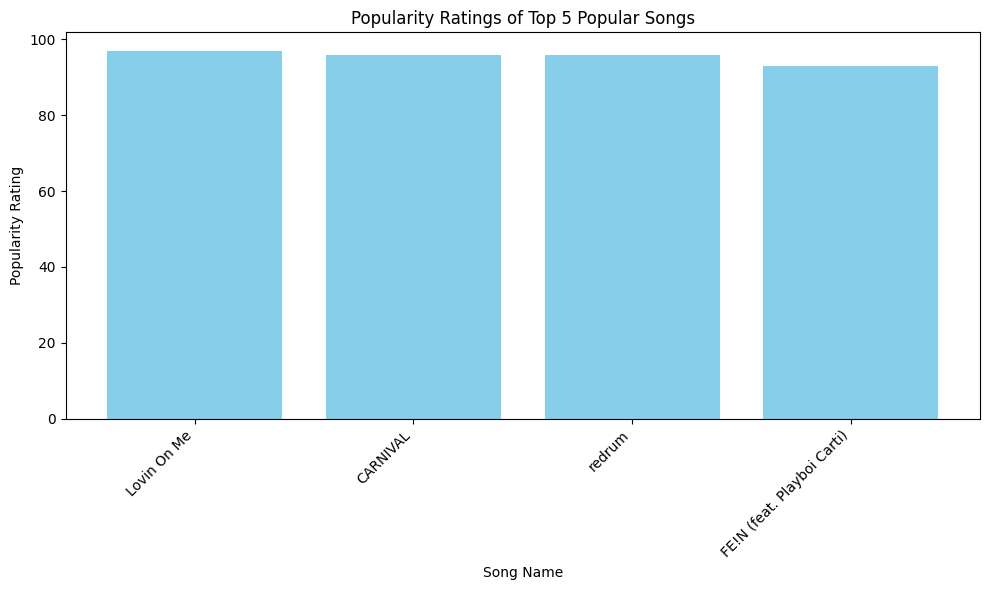

In [37]:
# Sort the DataFrame based on the "Popularity" column in descending order
top_songs = df.sort_values(by = 'Popularity', ascending = False).head(5)

# Extract the song names and their corresponding popularity ratings
song_names = top_songs['Track Name']
popularity_ratings = top_songs['Popularity']

# Plotting
plt.figure(figsize = (10, 6))
plt.bar(song_names, popularity_ratings, color = 'skyblue')
plt.title('Popularity Ratings of Top 5 Popular Songs')
plt.xlabel('Song Name')
plt.ylabel('Popularity Rating')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

3.  Find the top 5 trending genres based on the mean popularity of tracks within each genre.Visualize the mean popularity of tracks for the top 5 trending genres.

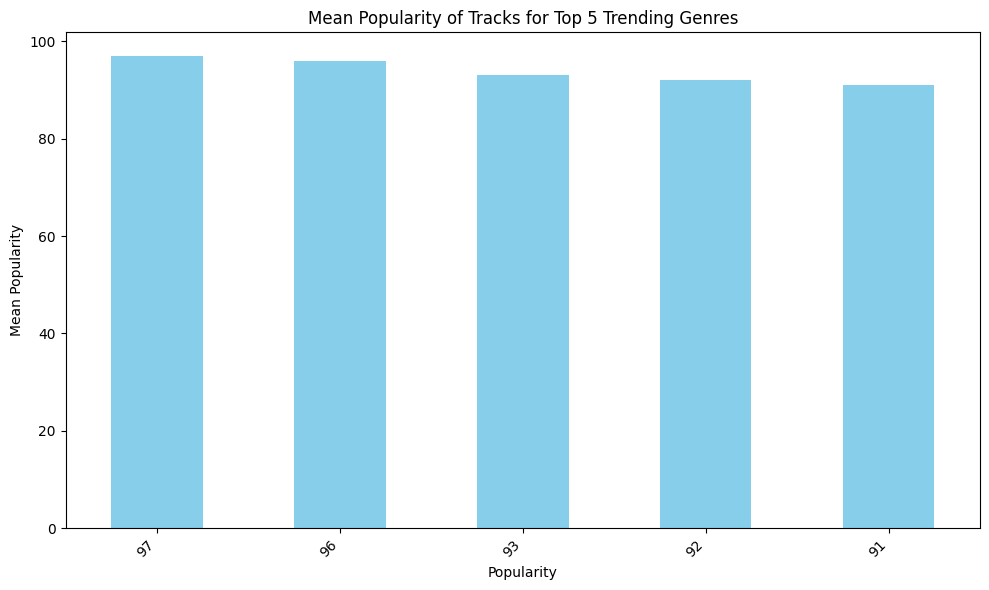

In [46]:
# Group the DataFrame by the "Genre" column and calculate the mean popularity
genre_popularity = df.groupby('Popularity')['Popularity'].mean()

# Sort the genres based on their mean popularity in descending order
top_trending_genres = genre_popularity.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_trending_genres.plot(kind='bar', color='skyblue')
plt.title('Mean Popularity of Tracks for Top 5 Trending Genres')
plt.xlabel('Popularity')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4.  Identify the top 5 longest songs among the tracks of the top 5 popular artists.Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot.

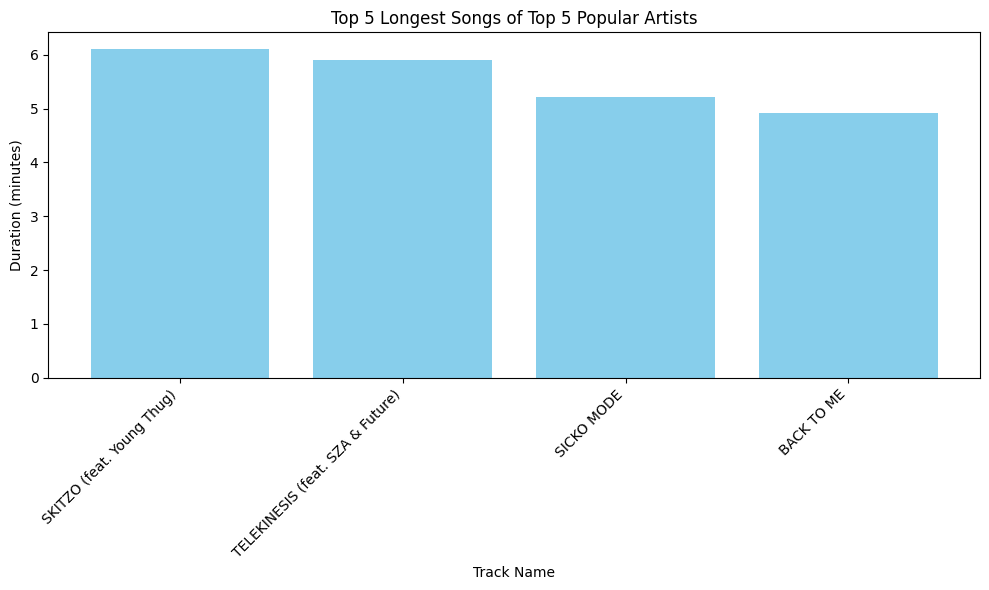

In [13]:
# Identify the top 5 popular artists based on the mean popularity of their tracks
top_5_popular_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5).index

# Step 2: Filter the DataFrame to include only tracks by the top 5 popular artists
filtered_df = df[df['Artist'].isin(top_5_popular_artists)]

# Step 3: Sort the filtered DataFrame by the duration of the songs in descending order
sorted_df = filtered_df.sort_values(by='Duration (ms)', ascending=False)

# Step 4: Select the top 5 longest songs
top_5_longest_songs = sorted_df.head(5)

# Step 5: Create a bar plot to represent the duration of the top 5 longest songs
plt.figure(figsize=(10, 6))
plt.bar(top_5_longest_songs['Track Name'], top_5_longest_songs['Duration (ms)'] / (1000 * 60), color='skyblue')
plt.xlabel('Track Name')
plt.ylabel('Duration (minutes)')
plt.title('Top 5 Longest Songs of Top 5 Popular Artists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. Determine the top 5 most danceable songs based on their danceability scores.Illustrate the danceability 

 scores of the top 5 most danceable songs using PieChart.

It seems there's an issue with identifying the column name for danceability.